# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
#student details 1:  Daniel A. 4005

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse: Feature Scaling with Scikit-learn - Ben Keen: https://benalexkeen.com/feature-scaling-with-scikit-learn/
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

In this mission, we explore the Titanic dataset. Our goal predict whether a passenger survived the accident or not.
We do that by engaging in a machine learning - classification flow. 
At our service there are multiple features that will help us achieve our goal, such as age of passenger, number of family memebers on board his/her ticket fair, port of origin and more.
We begin by examining the interesting connections present in the dataset, then we adjust its content to comply with the the two examined learning models.
Lastly, we look for the best set of hyperparameters for each model, train the models with those hyperparameters and compare the results.

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

<h4>modules imports</h4>

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import Normalizer,StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h4>datasets loading - five first rows of each</h4>

In [12]:
trainset = pd.read_csv("./data/titanic_train.csv")
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [13]:
testset = pd.read_csv("./data/titanic_test.csv")
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


<h3>EDA</h3>

<Axes: xlabel='Survived', ylabel='count'>

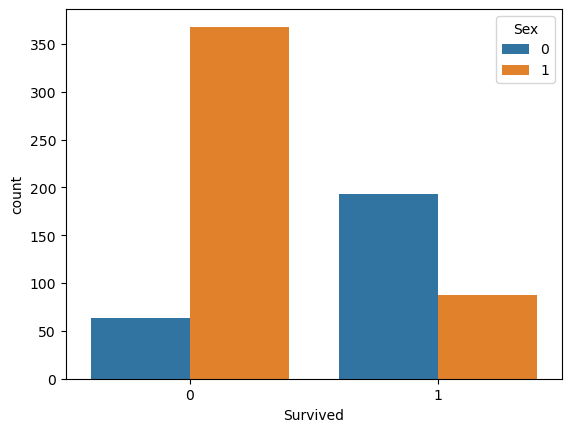

In [15]:
sns.countplot(x="Survived", hue ="Sex" , data=trainset, palette='tab10')

<h5>countplot - the majority of the survivors were women, the majority of the casualties were men</h2>

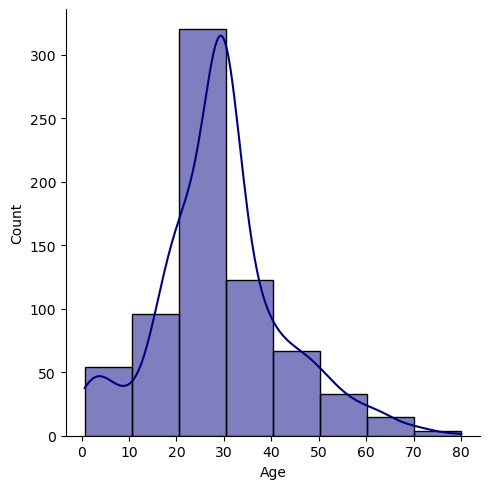

In [17]:
sns.displot(trainset['Age'], kde= True, color = "navy" , bins = 8)

<h5>distribution plot - shows the age distribution among the passengers</h5>

<Axes: xlabel='Age', ylabel='Fare'>

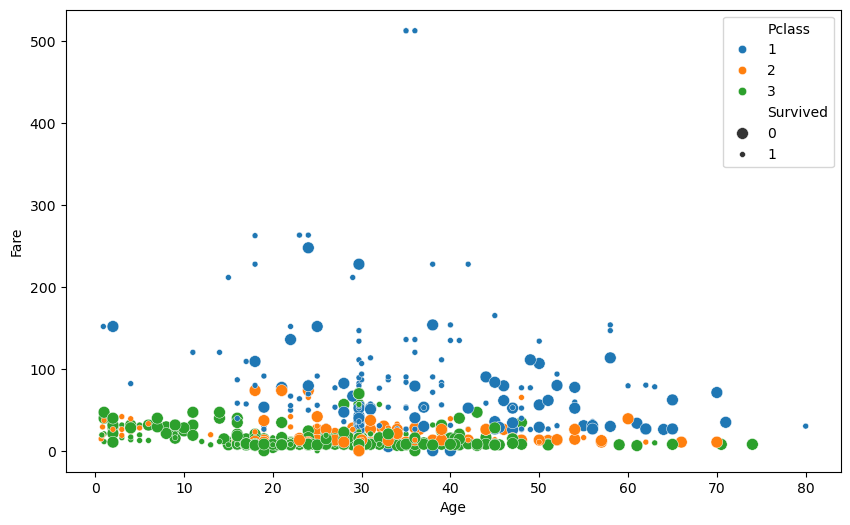

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', data=trainset, hue='Pclass', size='Survived', palette='tab10')

<h5>Scatter plot that shows the age, the class and the condition of the passengers</h5>

<Axes: xlabel='Pclass', ylabel='Age'>

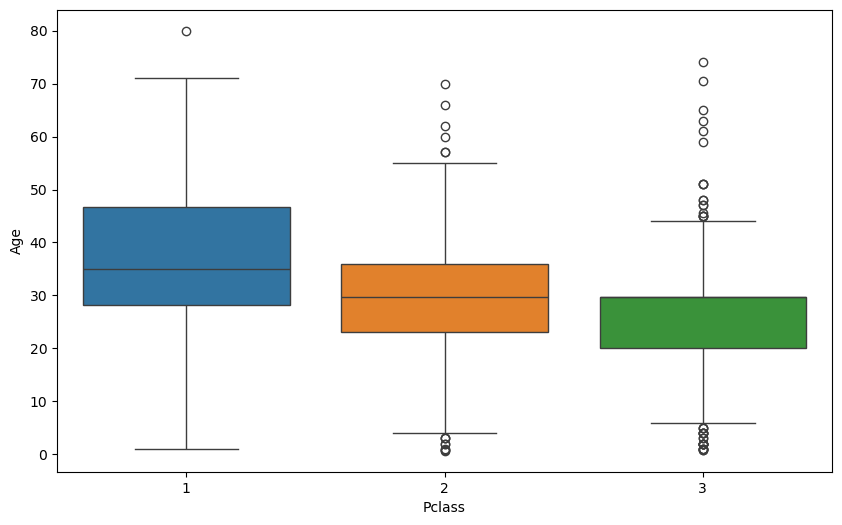

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(hue="Pclass", x="Pclass", y="Age", palette='tab10', legend=False, data=trainset)

<h5>boxplot - In general, the older the passenger - the higher its class</h5>

In [23]:
trainset['Embarked'].unique()

array([1, 0, 2, 3], dtype=int64)

In [24]:
embarked_encoding_train = pd.get_dummies(trainset['Embarked'], drop_first=False)
embarked_encoding_test = pd.get_dummies(testset['Embarked'],drop_first=False)
trainset_encoded = pd.concat([trainset, embarked_encoding_train],axis=1)
testset_encoded = pd.concat([testset, embarked_encoding_test], axis=1)
trainset_encoded.drop('Embarked',axis=1, inplace=True)
testset_encoded.drop('Embarked',axis=1, inplace=True)
trainset_encoded.columns = trainset_encoded.columns.astype(str)
testset_encoded.columns = testset_encoded.columns.astype(str)
print(trainset_encoded)

     Pclass  Sex        Age  SibSp  Parch      Fare  Survived      0      1  \
0         1    0  54.000000      1      0   78.2667         1  False   True   
1         2    0  45.000000      0      0   13.5000         1   True  False   
2         3    1  20.000000      0      0    9.5000         0   True  False   
3         3    1  36.000000      0      0    7.8958         0   True  False   
4         3    1  22.000000      0      0    8.0500         0   True  False   
..      ...  ...        ...    ...    ...       ...       ...    ...    ...   
707       1    1  54.000000      0      0   51.8625         0   True  False   
708       3    1  14.000000      5      2   46.9000         0   True  False   
709       2    0   6.000000      0      1   33.0000         1   True  False   
710       2    1  29.699118      0      0    0.0000         0   True  False   
711       1    0  25.000000      1      2  151.5500         0   True  False   

         2      3  
0    False  False  
1    False 

In [25]:
X_train = trainset_encoded.drop('Survived',axis = 1)
y_train = trainset_encoded['Survived']
X_test = testset_encoded.drop('Survived',axis = 1)
y_test = testset_encoded['Survived']

In [26]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3
0,3,1,35.000000,0,0,7.0500,True,False,False,False
1,3,1,30.000000,0,0,7.2500,True,False,False,False
2,3,1,29.699118,0,0,14.5000,True,False,False,False
3,3,0,21.000000,0,0,7.7500,False,False,True,False
4,3,1,32.000000,0,0,56.4958,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
174,3,1,29.000000,0,0,7.7500,False,False,True,False
175,3,0,45.000000,0,1,14.4542,False,True,False,False
176,2,1,23.000000,0,0,13.0000,True,False,False,False
177,3,1,40.000000,1,4,27.9000,True,False,False,False


<h5>One-hot encoding - being intentionally vague about unlinked values</h5>

## Part 3 - Experiments
You could add as many code cells as needed

<strong>Different kinds of scalers</strong>

<h5>Standard Scaler</h5>

$\dfrac{x_i – mean(x)}{std(x)}$

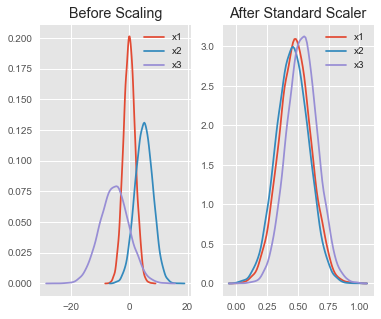

<h5>MinMax Scaler</h5>

$\dfrac{x_i – min(x)}{max(x) – min(x)}$

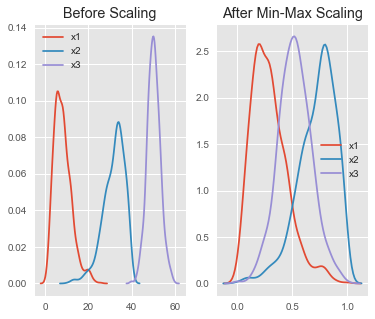

<h5>Robust Scaler</h5>

$\dfrac{x_i – Q_1(x)}{Q_3(x) – Q_1(x)}$

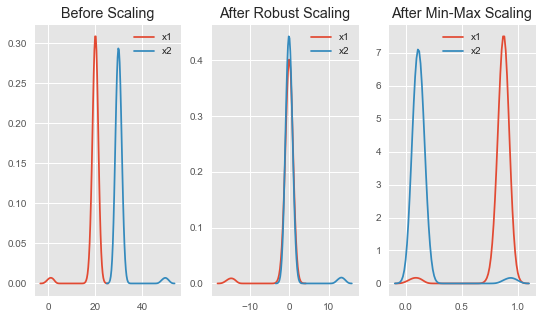

<h5>Normalizer</h5>

$\dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$

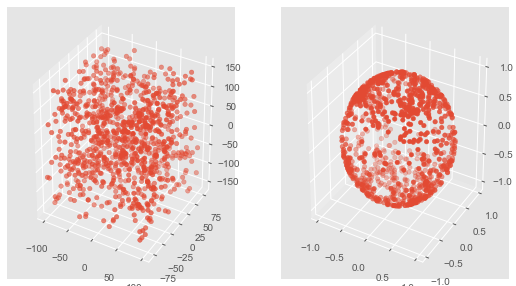

<strong>Pipelining - scaling on the go</strong>

<h5>KNN</h5>

In [44]:
pipe = Pipeline([
    ('scaler' , MinMaxScaler()), #will be dynamically swapped during GridSearch
    ('knn' , KNeighborsClassifier())
])
knn_parameters = {'scaler' : [StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer()],
                  'knn__algorithm': [ 'brute','ball_tree', 'kd_tree'],
                 'knn__n_neighbors' : [3,5,7,9,11],
                  'knn__weights' : ['distance','uniform']
                 }
knn = GridSearchCV(pipe,knn_parameters,scoring='f1',cv=5)
knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['brute', 'ball_tree', 'kd_tree'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['distance', 'uniform'],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer()]},
             scoring='f1')

In [45]:
knnresults = pd.DataFrame(knn.cv_results_)
knnresults[["param_knn__algorithm", "param_knn__n_neighbors", "param_knn__weights","param_scaler", "mean_test_score","rank_test_score"]]

,param_knn__algorithm,param_knn__n_neighbors,param_knn__weights,param_scaler,mean_test_score,rank_test_score
0,brute,3,distance,StandardScaler(),0.723633,25
1,brute,3,distance,MinMaxScaler(),0.713110,65
2,brute,3,distance,RobustScaler(),0.712912,69
3,brute,3,distance,Normalizer(),0.630499,106
4,brute,3,uniform,StandardScaler(),0.735765,4
...,...,...,...,...,...,...
115,kd_tree,11,distance,Normalizer(),0.633623,100
116,kd_tree,11,uniform,StandardScaler(),0.753570,3
117,kd_tree,11,uniform,MinMaxScaler(),0.700413,82
118,kd_tree,11,uniform,RobustScaler(),0.733308,10


In [46]:
knn.best_params_

{'knn__algorithm': 'brute',
 'knn__n_neighbors': 11,
 'knn__weights': 'uniform',
 'scaler': StandardScaler()}

<h5>SVM</h5>

The Equation of the hyperplane created by SVM is $w^*x-b^*=0$

The model $f(x)$ is defined as $f(x)=sign(w^*x-b^*)$

The model operates under the below two constrains:

$$
wx - b \geq +1 \quad \text{if } y_i = +1
$$


$$
wx - b \leq -1 \quad \text{if } y_i = -1
$$


<img src='https://i.postimg.cc/mg1rCH5r/svm.jpg'>

The distance between the two parallel hyperplanes is given by <strong>$\frac{2}{\| w \|}$</strong>

The optimization problem that SVM solves is:

<strong>Minimize ${\| w \|}$ subject to $y_i(wx_i-b)\geq 1\quad \text {for} \quad i=1....N $ </strong>

<h3>4 kernel function candidates:</h3>

<strong>Polynomial Kernel: $K(x_i, x_j) = \left( \gamma \cdot x_i^T x_j + r \right)^d$</strong>

<strong>Linear Kernel: $K(x_i, x_j) = x_i^T x_j$</strong>

<strong>Hyperbolic Sigmoid Kernel: $K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$</strong>

<strong>RBF Kernel: $K(x_i, x_j) = e^{-\frac{\| x_i - x_j \|^2}{2\sigma^2}}$</strong>

In [61]:
pipe1 = Pipeline([
    ('scaler' , Normalizer()), #will be dynamically swapped during GridSearch
    ('SVC' , SVC())
])
svc_parameters = {'scaler' : [StandardScaler(),MinMaxScaler(),RobustScaler(),Normalizer()],
                 'SVC__C' : [0.1,1,10],
                 'SVC__kernel' : ['poly','linear', 'sigmoid', 'rbf']}
svc = GridSearchCV(pipe1,svc_parameters,scoring='f1', cv=5)
svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', Normalizer()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.1, 1, 10],
                         'SVC__kernel': ['poly', 'linear', 'sigmoid', 'rbf'],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer()]},
             scoring='f1')

In [62]:
svcresults = pd.DataFrame(svc.cv_results_)
svcresults[["param_SVC__C", "param_SVC__kernel","param_scaler", "mean_test_score","rank_test_score"]]

,param_SVC__C,param_SVC__kernel,param_scaler,mean_test_score,rank_test_score
0,0.1,poly,StandardScaler(),0.475096,44
1,0.1,poly,MinMaxScaler(),0.720261,9
2,0.1,poly,RobustScaler(),0.384750,48
3,0.1,poly,Normalizer(),0.530696,35
4,0.1,linear,StandardScaler(),0.720261,9
5,0.1,linear,MinMaxScaler(),0.720261,9
6,0.1,linear,RobustScaler(),0.720261,9
7,0.1,linear,Normalizer(),0.510135,40
8,0.1,sigmoid,StandardScaler(),0.715985,21
9,0.1,sigmoid,MinMaxScaler(),0.442075,46


In [63]:
svc.best_params_

{'SVC__C': 1, 'SVC__kernel': 'rbf', 'scaler': StandardScaler()}

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

<h5>KNN</h5>

In [66]:
bestknnscaler = knn.best_params_['scaler']
bestknnscaler.fit(X_train)
scaled_X_train_knn = pd.DataFrame(bestknnscaler.transform(X_train), columns=X_train.columns)
scaled_X_test_knn = pd.DataFrame(bestknnscaler.transform(X_test), columns=X_test.columns)
knnbest = KNeighborsClassifier(algorithm=knn.best_params_["knn__algorithm"], n_neighbors = knn.best_params_["knn__n_neighbors"], weights= knn.best_params_["knn__weights"])
knnbest.fit(scaled_X_train_knn,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11)

<h5>SVM</h5>

In [68]:
bestsvcscaler = svc.best_params_['scaler']
bestsvcscaler.fit(X_train)
scaled_X_train_svc = pd.DataFrame(bestsvcscaler.transform(X_train), columns=X_train.columns)
scaled_X_test_svc = pd.DataFrame(bestsvcscaler.transform(X_test), columns=X_test.columns)
svcbest = SVC(C=svc.best_params_['SVC__C'], kernel=svc.best_params_['SVC__kernel'])
svcbest.fit(scaled_X_train_svc,y_train)

SVC(C=1)

## Part 5 - Apply on test and show model performance estimation

<h5>KNN</h5>

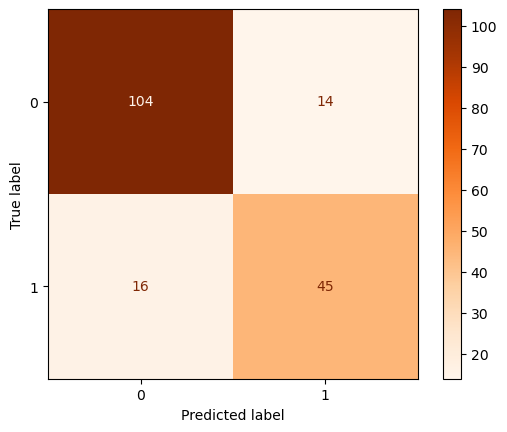

In [93]:
ConfusionMatrixDisplay.from_estimator(knnbest, scaled_X_test_knn,y_test, values_format="d", cmap="Oranges")

In [95]:
print(classification_report(y_test, knnbest.predict(scaled_X_test_knn), digits=3))

              precision    recall  f1-score   support

           0      0.867     0.881     0.874       118
           1      0.763     0.738     0.750        61

    accuracy                          0.832       179
   macro avg      0.815     0.810     0.812       179
weighted avg      0.831     0.832     0.832       179



In [97]:
pd.DataFrame(knnbest.predict(scaled_X_test_knn)).head()

,0
0,0
1,0
2,0
3,1
4,0


<h5>SVM</h5>

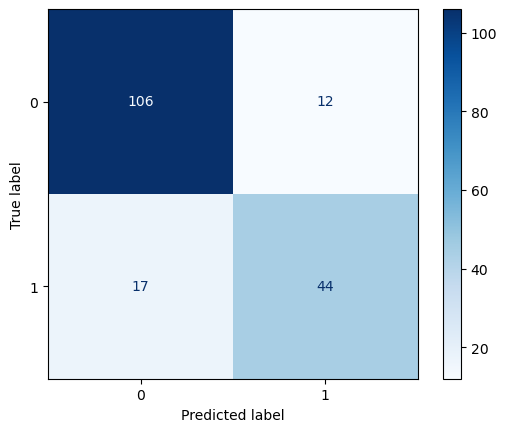

In [100]:
ConfusionMatrixDisplay.from_estimator(svcbest, scaled_X_test_svc,y_test, values_format="d", cmap="Blues")

In [102]:
print(classification_report(y_test, svcbest.predict(scaled_X_test_svc), digits=3))

              precision    recall  f1-score   support

           0      0.862     0.898     0.880       118
           1      0.786     0.721     0.752        61

    accuracy                          0.838       179
   macro avg      0.824     0.810     0.816       179
weighted avg      0.836     0.838     0.836       179



In [104]:
pd.DataFrame(svcbest.predict(scaled_X_test_svc)).head()

,0
0,0
1,0
2,0
3,1
4,0
